# Descriptive Statistics and Data Visualization
This notebook covers exploratory analysis for 430 features<br>
coming from 9 different categories of clinical data<br>
The analysis will include three steps:<br>
1. Extract Descriptive Statistics for each feature
2. Visualize the distribution 
3. Brief Summary of Findings

<br>

| Table Name | Variable |Description | 
| :--- | :--- | :--- | 
| Research Session Attendance|RSA |Records attendence for each week of treatment | 
| Demographics|DEM |Sex, Ethnicity, Race | 
| Urine Drug Screen| UDS  |Drug test for 8 different drug classes, taken weekly for 24 weeks | 
| DSM-IV Diagnosis|DSM |Tracks clinical diagnosis for substance use disorder, in accordance with DSM guidelines| 
| Medical and Psychiatric History|MDH |Tracks medical and psychiatric history of 18 different Conditions| 
| Physical Exam|PEX |Tracks the appearance and condition of patients for 12 different physical observations| 
| Pregnancy and Birth Control|PBC |Pregnancy test taken once per month on weeks 0, 4, 8, 12, 16, 20, 24| 
| Timeline Follow Back Survey|TFB |Surveys for self reported drug use, collected every 4 weeks, includes previous 30 days of use ot week 0, 4, 8, 12, 16, 20, 24| 
| Dose Record |DOS |Records the medication, averge weekly dose and week of treatment| 


### Import Required Libraries

In [1]:
import pandas as pd # data manipulation
import numpy as np # numerical computation
import matplotlib.pyplot as plt # visualization
import seaborn as sns # enhanced visualization
import warnings # ignore warnings
import helper # custom data transformation functions
from IPython.display import display, Markdown # display and markdown conversion
import re # regular expressions
warnings.filterwarnings('ignore') # ignore warnings

# Load the data
data = pd.read_csv('../data/merged_data.csv')

# Display the first few rows of the data
data.shape

(1917, 431)

### Review RSA Data
Research Session Attendance: RSA<br>
Records attendence for 24 weeks of treatment. <br>
Recorded each week<br>

Descriptive statistics for each week of attendence:<br>
- Avg weekly attendance 851 patients per week
- Avg proportion of patients attending weekly 44%
<br>


<br>
We will plot the weekly distribution of percentage of patients attending treatment

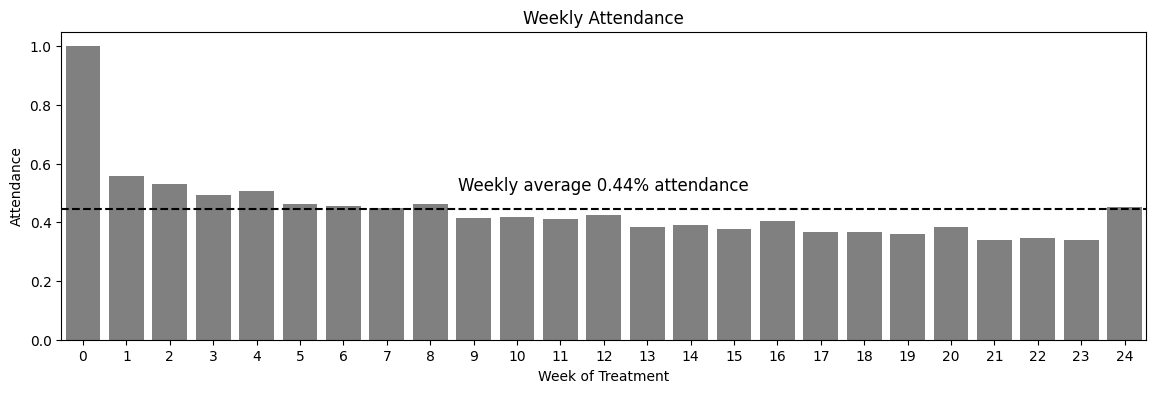

In [2]:
# create df for rsa clinical data
rsa = helper.series_func(data, 'rsa', 'mean')

# set params to plot the data series
series, title, ylabel, xlabel = rsa, 'Weekly Attendance', 'Attendance', 'Week of Treatment'

# call helper function to plot the data series
helper.plot_func(series, title, ylabel, xlabel)
# create bespoke annotation for this table
plt.annotate(
        f"Weekly average {series.mean().round(2)}% attendance",
        xy=(0.5, 0.5),
        xycoords="axes fraction",
        ha="center",
        va="center",
        fontsize=12,
        color="black",
    );

### Review Demographic Data
Demographics: DEM<br>
Data includes response to questions about gender, race and ethnicity<br>
Data includes 12 different responses<br>
Data collected at baseline assessment<br>

<br>

|    | column                    | value              |   count |   percentage |
|---:|:--------------------------|:-------------------|--------:|-------------:|
|  0 | dem_gender                | male               |    1283 |         0.67 |
|  1 | dem_gender                | female             |     631 |         0.33 |
|  3 | dem_ethnicity             | not_spanish_origin |    1579 |         0.82 |
|  4 | dem_ethnicity             | spanish_origin     |     328 |         0.17 |
|  7 | dem_race_no_answer        | 1.0                |       5 |         0    |
|  9 | dem_race_unknown          | 1.0                |       8 |         0    |
| 11 | dem_race_amer_ind         | 1.0                |      85 |         0.04 |
| 13 | dem_race_asian            | 1.0                |      29 |         0.02 |
| 15 | dem_race_black            | 1.0                |     233 |         0.12 |
| 17 | dem_race_pacific_islander | 1.0                |      12 |         0.01 |
| 18 | dem_race_white            | 1.0                |    1379 |         0.72 |
| 21 | dem_race_other            | 1.0                |     284 |         0.15 |

In [3]:
# This code creates an efficient table to view value_counts of the demographics data

# create the demographics dataframe
dem = data[[col for col in data.columns if col.startswith('dem_')]]

# call the helper function to extract the value counts and organize them into a table
result_df = helper.df_value_counts(dem)

# remove index row 2, 5 - these have mostly missing values and not useful for analysis
result_df = result_df.drop(result_df.index[[2,5]])

# remove values with 0.0 - these are the negative binary response, not useful for analysis
result_df = result_df[result_df['value'] != 0.0]

# convert to markdown for portability
result_df.to_markdown()

# display markdown table through ipython display
from IPython.display import display, Markdown
display(Markdown(result_df.to_markdown()))

|    | column                    | value              |   count |   percentage |
|---:|:--------------------------|:-------------------|--------:|-------------:|
|  0 | dem_gender                | male               |    1283 |         0.67 |
|  1 | dem_gender                | female             |     631 |         0.33 |
|  3 | dem_ethnicity             | not_spanish_origin |    1579 |         0.82 |
|  4 | dem_ethnicity             | spanish_origin     |     328 |         0.17 |
|  7 | dem_race_no_answer        | 1.0                |       5 |         0    |
|  9 | dem_race_unknown          | 1.0                |       8 |         0    |
| 11 | dem_race_amer_ind         | 1.0                |      85 |         0.04 |
| 13 | dem_race_asian            | 1.0                |      29 |         0.02 |
| 15 | dem_race_black            | 1.0                |     233 |         0.12 |
| 17 | dem_race_pacific_islander | 1.0                |      12 |         0.01 |
| 18 | dem_race_white            | 1.0                |    1379 |         0.72 |
| 21 | dem_race_other            | 1.0                |     284 |         0.15 |

### Review UDS Data
Urine Drug Screen: UDS<br>
Drug test for 8 different drug classes, taken weekly for 24 weeks<br>
<br>

### Key Descriptive Stats
**Mean % positive test rate for each drug class per week**<br>
|       |   pro |   amp |   can |   ben |   mme |   oxy |   coc |   met |   opi |
|:------|------:|------:|------:|------:|------:|------:|------:|------:|------:|
| count | 25    | 25    | 25    | 25    | 25    | 25    | 25    | 25    | 25    |
| mean  |  0.53 |  0.55 |  0.63 |  0.59 |  0.74 |  0.55 |  0.67 |  0.56 |  0.71 |
| std   |  0.12 |  0.11 |  0.09 |  0.1  |  0.11 |  0.1  |  0.07 |  0.11 |  0.04 |
| min   |  0.04 |  0.1  |  0.25 |  0.21 |  0.26 |  0.15 |  0.4  |  0.12 |  0.65 |
| 25%   |  0.52 |  0.54 |  0.62 |  0.58 |  0.74 |  0.53 |  0.66 |  0.55 |  0.69 |
| 50%   |  0.56 |  0.58 |  0.66 |  0.62 |  0.77 |  0.58 |  0.68 |  0.59 |  0.71 |
| 75%   |  0.6  |  0.62 |  0.68 |  0.65 |  0.79 |  0.61 |  0.71 |  0.62 |  0.72 |
| max   |  0.64 |  0.65 |  0.72 |  0.69 |  0.82 |  0.65 |  0.73 |  0.66 |  0.85 |

**Mean count of positive tests for each drug class per week**<br>
|       |     pro |     amp |     can |     ben |     mme |     oxy |     coc |     met |     opi |
|:------|--------:|--------:|--------:|--------:|--------:|--------:|--------:|--------:|--------:|
| count |   25    |   25    |   25    |   25    |   25    |   25    |   25    |   25    |   25    |
| mean  | 1020.64 | 1061.4  | 1213.2  | 1138.48 | 1428.56 | 1052.52 | 1280.08 | 1073.6  | 1357.8  |
| std   |  231.7  |  216.64 |  180.57 |  192.47 |  214.07 |  199.41 |  135.54 |  212.59 |   77.19 |
| min   |   83    |  190    |  480    |  403    |  491    |  282    |  762    |  223    | 1238    |
| 25%   |  996    | 1039    | 1193    | 1107    | 1424    | 1023    | 1257    | 1050    | 1314    |
| 50%   | 1080    | 1115    | 1262    | 1192    | 1483    | 1105    | 1309    | 1124    | 1360    |
| 75%   | 1147    | 1182    | 1306    | 1254    | 1521    | 1166    | 1361    | 1188    | 1380    |
| max   | 1223    | 1254    | 1371    | 1315    | 1576    | 1239    | 1407    | 1267    | 1638    |

### Data Visualization
This data is very complex, where we will have to pre-process the data<br>
to get meaningful visualizations.<br>
<br>
We will take the following steps to visual patient test data during treatment.
1. Create a test dataframe: Will contain 227 columns, representing 9 drug tests<br>
taken every week for 24 weeks.
2. Extract relevant text fields from the dataset for plotting
3. Create a plot dataframe that has a series with the % test rate for each drug<br>
4. Creat a workflow to automate plot rendering for 9 drug tests
5. Plot will be annotated with key insights to help the user learn them immediately<br>




In [22]:
# create tests dataframe
tests = data[[col for col in data.columns if col.startswith('test_')]]

# Pull out the drug names for plotting

# extract relevant text fields
# Isolate the first 9 test columns
test_cols = tests.iloc[:,:9]

# trim the column names to remove prefix and suffix
# the list comprehension uses regex to remove prefix and suffix
# an example would be transform test_Opiate300_1 to Opiate300
test_cols = [re.sub(r'^.*?_(.*?)_.*$', r'\1', s) for s in test_cols.columns]

# create acronyms for drugs in dataframe for easier reading
# an example would be transform Opiate300 to opi
# provides easier reading for the dataframe
global_cols = [col.lower()[:3] for col in test_cols]

print('Series created for each drug class:')
# create a series for each drug class
for i in range(len(test_cols)):
    acronym = global_cols[i] # use three letter acronym for column name e.g. opi for Opiate300
    test = test_cols[i] # use drug name to pull columns from main dataset e.g. Opiate300 for opiate test
    globals()[acronym] = helper.series_func(data, test, 'sum').round(2) # build series
    globals()[acronym] = globals()[acronym].to_frame(acronym) # convert series to dataframe
    print(acronym,'created with shape of:',globals()[acronym].shape) # print shape of each dataframe

# merge each series into dataframe
drug_tests = pd.concat([pro, amp, can, ben, mme, oxy, coc, met, opi], axis=1)

# create dict to match acronyms with drug names for plotting
drug_dict = dict(zip(global_cols, test_cols))
print()
print('drug_tests Dataframe:  Positive test rate per drug class')
drug_tests

Series created for each drug class:
pro created with shape of: (25, 1)
amp created with shape of: (25, 1)
can created with shape of: (25, 1)
ben created with shape of: (25, 1)
mme created with shape of: (25, 1)
oxy created with shape of: (25, 1)
coc created with shape of: (25, 1)
met created with shape of: (25, 1)
opi created with shape of: (25, 1)

drug_tests Dataframe:  Positive test rate per drug class


,pro,amp,can,ben,mme,oxy,coc,met,opi
0,83.0,190.0,480.0,403.0,491.0,282.0,762.0,223.0,1638.0
1,772.0,822.0,1024.0,922.0,1271.0,803.0,1119.0,838.0,1298.0
2,798.0,847.0,1026.0,911.0,1270.0,839.0,1124.0,858.0,1238.0
3,895.0,945.0,1107.0,998.0,1341.0,929.0,1199.0,955.0,1279.0
4,892.0,933.0,1124.0,992.0,1350.0,919.0,1200.0,947.0,1272.0
5,951.0,1002.0,1162.0,1055.0,1371.0,983.0,1199.0,1014.0,1260.0
6,998.0,1040.0,1195.0,1129.0,1424.0,1026.0,1265.0,1050.0,1343.0
7,1022.0,1066.0,1220.0,1138.0,1451.0,1056.0,1309.0,1075.0,1346.0
8,996.0,1039.0,1193.0,1107.0,1432.0,1023.0,1257.0,1053.0,1314.0
9,1080.0,1111.0,1262.0,1181.0,1477.0,1104.0,1321.0,1124.0,1360.0


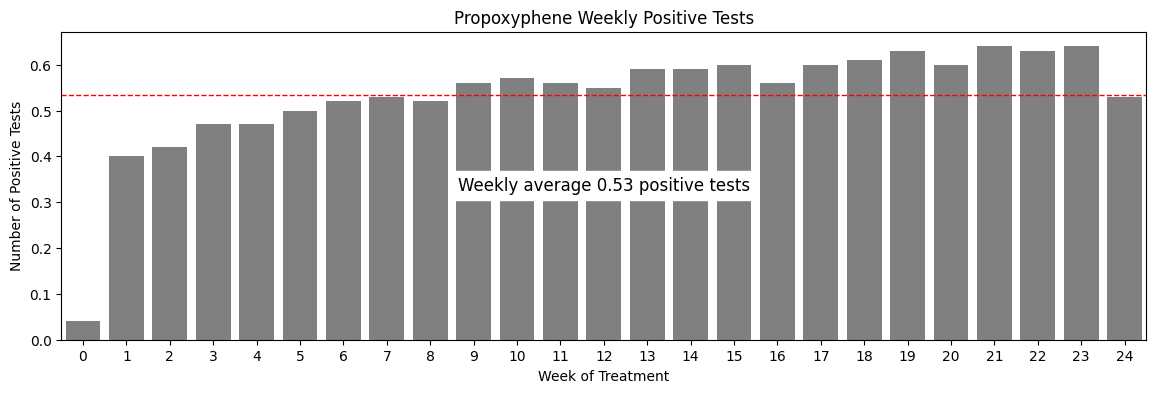

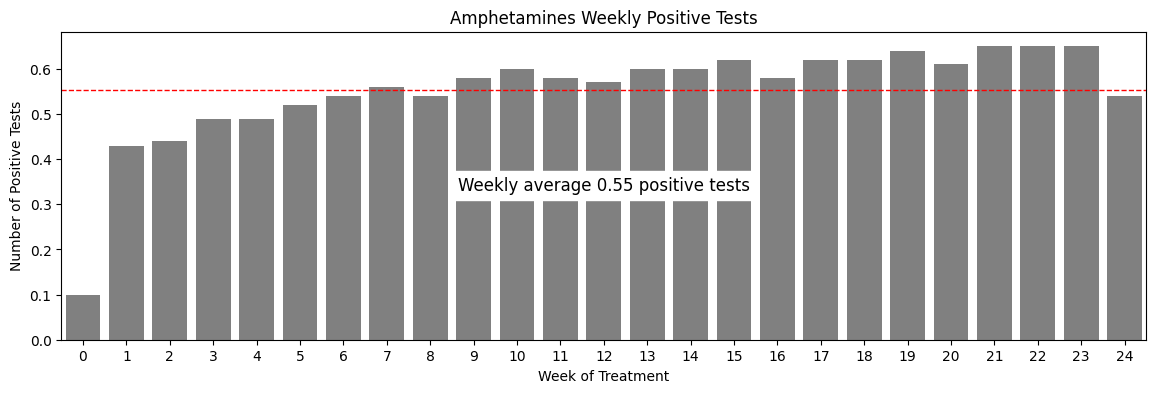

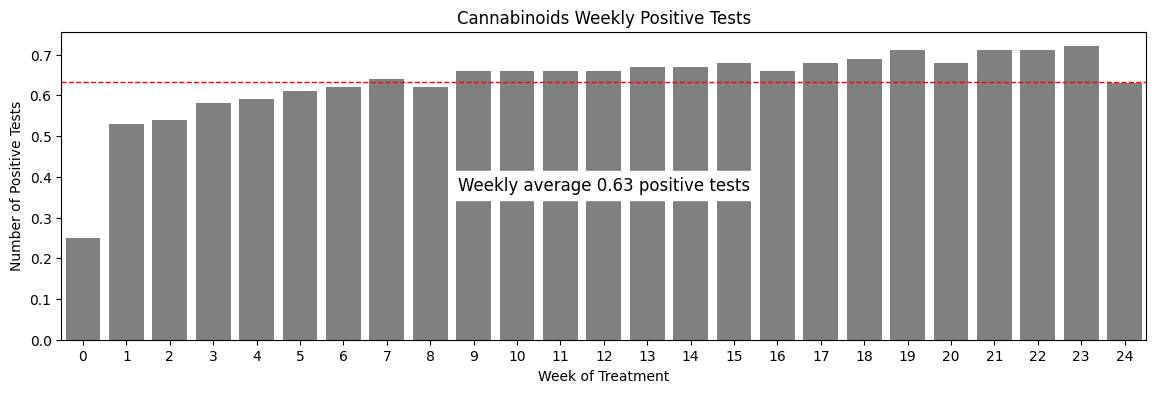

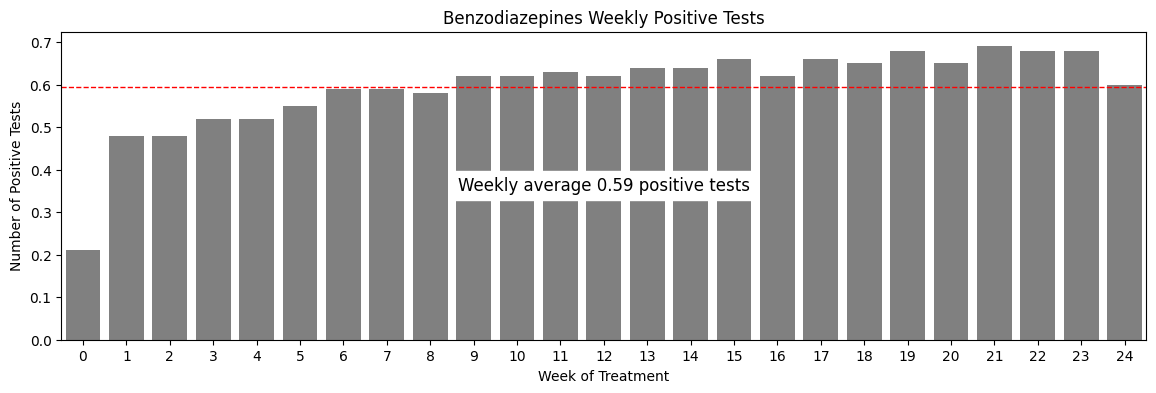

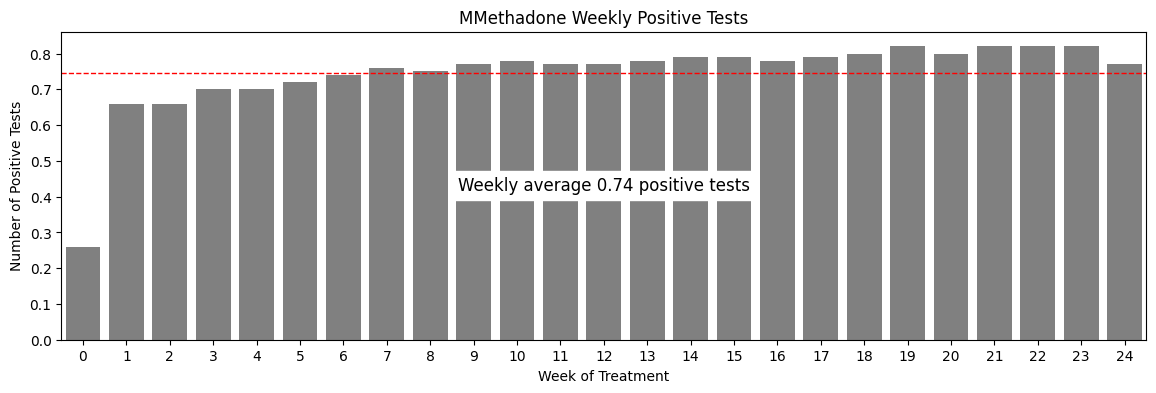

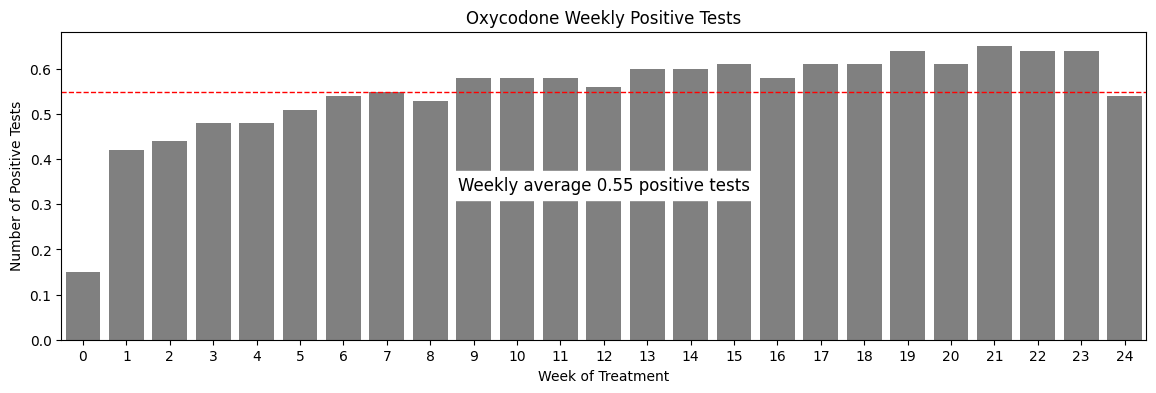

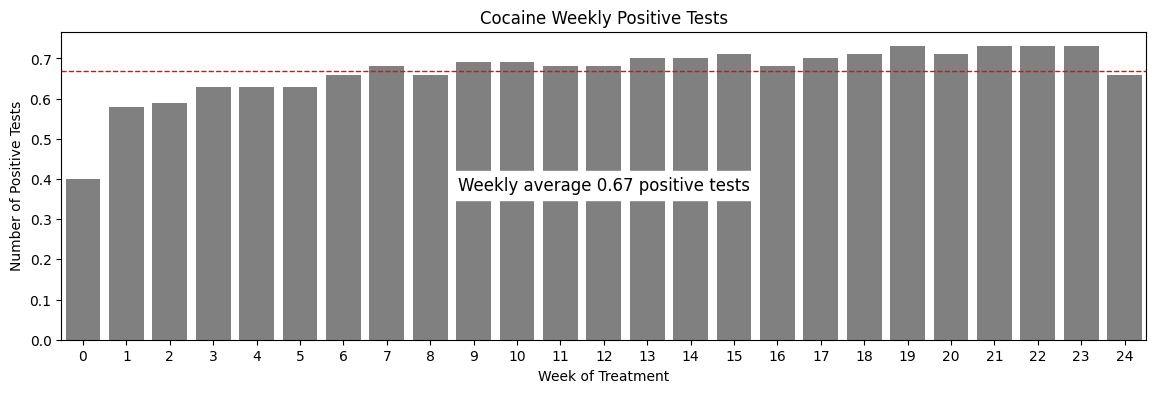

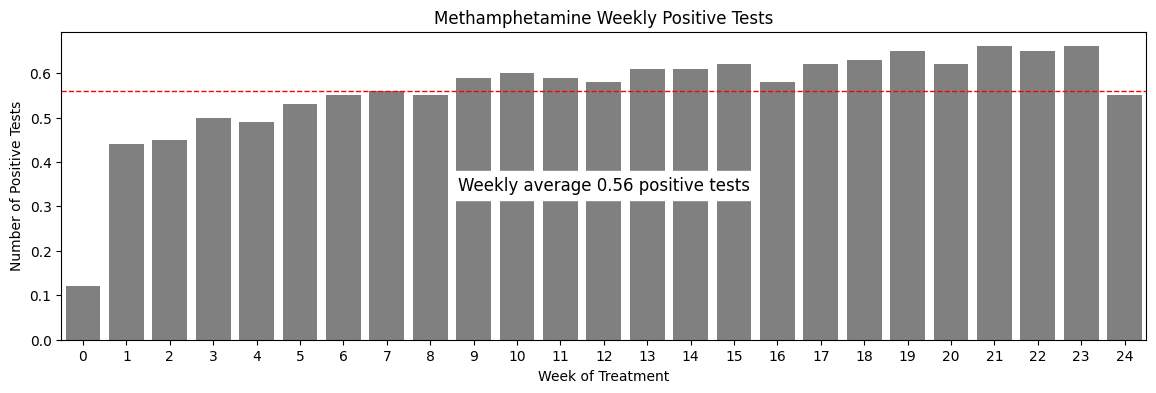

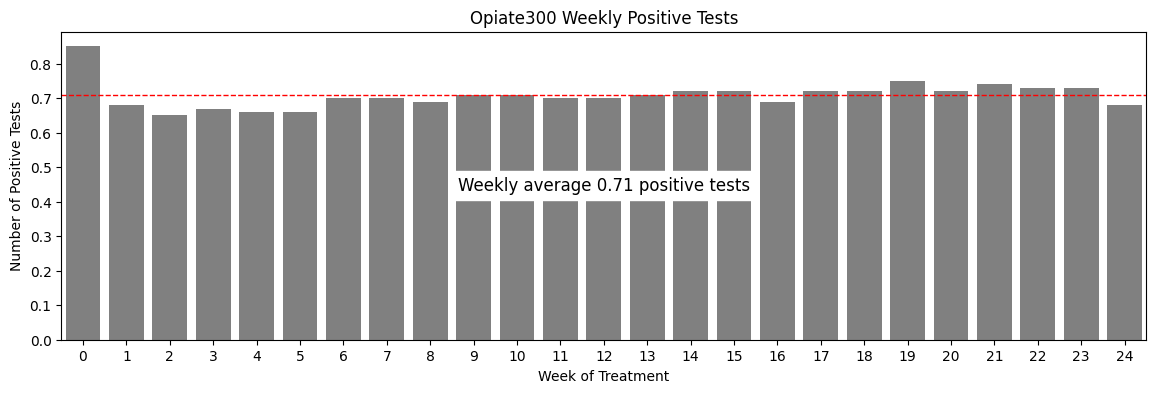

In [5]:
# create a separate plot for each drug test


# create workflow to automate plotting of 9 different drug classes
# I chose to use a single loop and pull variables from lists insted of using nested loops

# iterate through list of drug test names (9 totla)
for i, col in enumerate(drug_tests.columns):
	# next 4 steps make variables available for each plot
	drug_names = drug_tests.columns[i]  # this is a list available for plotting
	title = f'{drug_dict[col]} Weekly Positive Tests'  # title argument for plot_func()
	ylabel = 'Number of Positive Tests' # ylabel argument for plot_func()
	xlabel = 'Week of Treatment' # xlabel argument for plot_func()
	
	# the next 5 steps create the plot, apply annotation to project the insights to the user
	fig = plt.figure(figsize=(14, 4))  # Create a new figure
	sns.barplot(x=drug_tests.index, y=col, data=drug_tests, color='gray') # use seaborn to create a barplot
	plt.axhline(drug_tests[col].mean(), color='red', linestyle='--', linewidth=1)  # Add mean to show change from central tendency
	plt.annotate( # create a small text box showing a float with positive test rate
		f"Weekly average {drug_tests[col].mean().round(2)} positive tests",
		xy=(0.5, 0.5),
		xycoords="axes fraction",
		ha="center",
		va="center",
		fontsize=12,
		color="black",
		backgroundcolor='white'
	);
	
	# Add plot titles and labels
	plt.title(title)
	plt.xlabel(xlabel)
	plt.ylabel(ylabel)
	
	plt.show()  # Display the plot

### Create a Markdown Table with Descriptive Statistics
- We will cover both the positive test rate and count of positive tests<br>

In [23]:
# create descriptive stats for drug tests
drug_tests_pos_count = drug_tests.describe().round(2)

# convert to markdown for portability
drug_tests_pos_count.to_markdown()

# display markdown table through ipython display
display(Markdown(drug_tests_pos_count.to_markdown()))

|       |     pro |     amp |     can |     ben |     mme |     oxy |     coc |     met |     opi |
|:------|--------:|--------:|--------:|--------:|--------:|--------:|--------:|--------:|--------:|
| count |   25    |   25    |   25    |   25    |   25    |   25    |   25    |   25    |   25    |
| mean  | 1020.64 | 1061.4  | 1213.2  | 1138.48 | 1428.56 | 1052.52 | 1280.08 | 1073.6  | 1357.8  |
| std   |  231.7  |  216.64 |  180.57 |  192.47 |  214.07 |  199.41 |  135.54 |  212.59 |   77.19 |
| min   |   83    |  190    |  480    |  403    |  491    |  282    |  762    |  223    | 1238    |
| 25%   |  996    | 1039    | 1193    | 1107    | 1424    | 1023    | 1257    | 1050    | 1314    |
| 50%   | 1080    | 1115    | 1262    | 1192    | 1483    | 1105    | 1309    | 1124    | 1360    |
| 75%   | 1147    | 1182    | 1306    | 1254    | 1521    | 1166    | 1361    | 1188    | 1380    |
| max   | 1223    | 1254    | 1371    | 1315    | 1576    | 1239    | 1407    | 1267    | 1638    |

### Review DSM Data
DSM provides the guidlines for diagnosing mental illness.<br>
DSM diagnosis is collected at baseline assesment<br>
The patient can have 3 different values for diagnosis for 6 drug classes:<br>
- Abuse
- Dependence
- No Diagnosis

<br>
The tables will be grouped by diagnosis to produce insights to the reader immediately<br>
<br>

**Abuse**
| drugclass          | value   |   count |   percentage |
|:----------------|:--------|--------:|-------------:|
| dsm_cannabis    | abuse   |     218 |         0.11 |
| dsm_cocaine     | abuse   |     185 |         0.1  |
| dsm_sedative    | abuse   |     123 |         0.06 |
| dsm_opiates     | abuse   |       1 |         0    |
| dsm_alcohol     | abuse   |     262 |         0.14 |
| dsm_amphetamine | abuse   |     109 |         0.06 | 

**Dependence**
| drugclass          | value      |   count |   percentage |
|:----------------|:-----------|--------:|-------------:|
| dsm_cannabis    | dependence |      73 |         0.04 |
| dsm_cocaine     | dependence |     305 |         0.16 |
| dsm_sedative    | dependence |      90 |         0.05 |
| dsm_opiates     | dependence |    1486 |         0.78 |
| dsm_alcohol     | dependence |     102 |         0.05 |
| dsm_amphetamine | dependence |      67 |         0.03 |

**No Diagnosis**
 | drugclass          | value        |   count |   percentage |
|:----------------|:-------------|--------:|-------------:|
| dsm_cannabis    | no_diagnosis |    1196 |         0.62 |
| dsm_cocaine     | no_diagnosis |     997 |         0.52 |
| dsm_sedative    | no_diagnosis |    1274 |         0.66 |
| dsm_alcohol     | no_diagnosis |    1123 |         0.59 |
| dsm_amphetamine | no_diagnosis |    1311 |         0.68 |

In [6]:
# This is the code that creates the markdown table above

# get the columns for the dsm data
dsm = data[[col for col in data.columns if col.startswith('dsm_')]]

# call helper function to extract the value counts and organize them into a table
dsm_vc = helper.df_value_counts(dsm)

# convert to markdown
dsm_vc.to_markdown()

# display markdown table through ipython display
display(Markdown(dsm_vc.to_markdown()))


|    | column          | value         |   count |   percentage |
|---:|:----------------|:--------------|--------:|-------------:|
|  0 | dsm_cannabis    | no_diagnosis  |    1196 |         0.62 |
|  1 | dsm_cannabis    | not_present   |     399 |         0.21 |
|  2 | dsm_cannabis    | abuse         |     218 |         0.11 |
|  3 | dsm_cannabis    | dependence    |      73 |         0.04 |
|  4 | dsm_cannabis    | not_evaluated |      31 |         0.02 |
|  5 | dsm_cocaine     | no_diagnosis  |     997 |         0.52 |
|  6 | dsm_cocaine     | not_present   |     399 |         0.21 |
|  7 | dsm_cocaine     | dependence    |     305 |         0.16 |
|  8 | dsm_cocaine     | abuse         |     185 |         0.1  |
|  9 | dsm_cocaine     | not_evaluated |      31 |         0.02 |
| 10 | dsm_sedative    | no_diagnosis  |    1274 |         0.66 |
| 11 | dsm_sedative    | not_present   |     399 |         0.21 |
| 12 | dsm_sedative    | abuse         |     123 |         0.06 |
| 13 | dsm_sedative    | dependence    |      90 |         0.05 |
| 14 | dsm_sedative    | not_evaluated |      31 |         0.02 |
| 15 | dsm_opiates     | dependence    |    1486 |         0.78 |
| 16 | dsm_opiates     | not_present   |     399 |         0.21 |
| 17 | dsm_opiates     | not_evaluated |      31 |         0.02 |
| 18 | dsm_opiates     | abuse         |       1 |         0    |
| 19 | dsm_alcohol     | no_diagnosis  |    1123 |         0.59 |
| 20 | dsm_alcohol     | not_present   |     399 |         0.21 |
| 21 | dsm_alcohol     | abuse         |     262 |         0.14 |
| 22 | dsm_alcohol     | dependence    |     102 |         0.05 |
| 23 | dsm_alcohol     | not_evaluated |      31 |         0.02 |
| 24 | dsm_amphetamine | no_diagnosis  |    1311 |         0.68 |
| 25 | dsm_amphetamine | not_present   |     399 |         0.21 |
| 26 | dsm_amphetamine | abuse         |     109 |         0.06 |
| 27 | dsm_amphetamine | dependence    |      67 |         0.03 |
| 28 | dsm_amphetamine | not_evaluated |      31 |         0.02 |

In [15]:
# reogroup the data into three tables to make it easier to read

# create list of group, each group will be a separate table
diagnosis = ['abuse', 'dependence', 'no_diagnosis']

# iterate through each diagnosis
for disorder in diagnosis:
    # create a dataframe for each disorder
    globals()[disorder] = dsm_vc[dsm_vc['value']==disorder]
    # convert to markdown
    globals()[disorder].to_markdown()
    # print the disorder before the ipython display
    print(disorder)
    display(Markdown(globals()[disorder].to_markdown()))
    

abuse


|    | column          | value   |   count |   percentage |
|---:|:----------------|:--------|--------:|-------------:|
|  2 | dsm_cannabis    | abuse   |     218 |         0.11 |
|  8 | dsm_cocaine     | abuse   |     185 |         0.1  |
| 12 | dsm_sedative    | abuse   |     123 |         0.06 |
| 18 | dsm_opiates     | abuse   |       1 |         0    |
| 21 | dsm_alcohol     | abuse   |     262 |         0.14 |
| 26 | dsm_amphetamine | abuse   |     109 |         0.06 |

dependence


|    | column          | value      |   count |   percentage |
|---:|:----------------|:-----------|--------:|-------------:|
|  3 | dsm_cannabis    | dependence |      73 |         0.04 |
|  7 | dsm_cocaine     | dependence |     305 |         0.16 |
| 13 | dsm_sedative    | dependence |      90 |         0.05 |
| 15 | dsm_opiates     | dependence |    1486 |         0.78 |
| 22 | dsm_alcohol     | dependence |     102 |         0.05 |
| 27 | dsm_amphetamine | dependence |      67 |         0.03 |

no_diagnosis


|    | column          | value        |   count |   percentage |
|---:|:----------------|:-------------|--------:|-------------:|
|  0 | dsm_cannabis    | no_diagnosis |    1196 |         0.62 |
|  5 | dsm_cocaine     | no_diagnosis |     997 |         0.52 |
| 10 | dsm_sedative    | no_diagnosis |    1274 |         0.66 |
| 19 | dsm_alcohol     | no_diagnosis |    1123 |         0.59 |
| 24 | dsm_amphetamine | no_diagnosis |    1311 |         0.68 |

### Review Medical and Psychiatric History Data
Medical and Psychiatric History: MDH<br>
Tracks medical and psychiatric history of 18 different Conditions<br>
With 3 possible responses for each condition:<br>
<br>

### Descriptive Statistics
There are 54 features to evaluate.<br>
Please contiue to scroll to review statistics for each patient history group<br>

In [29]:
# create a new dataframe for the mdh data
mdh = data[[col for col in data.columns if col.startswith('mdh_')]]

# call helper function to extract the value counts and organize them into a table
mdh_vc = helper.df_value_counts(mdh)

# convert to markdown
mdh_vc.to_markdown()

print('mdh dataset shape:',mdh_vc.shape)
display(Markdown(mdh_vc.to_markdown()))

mdh dataset shape: (54, 4)


|    | column                        | value         |   count |   percentage |
|---:|:------------------------------|:--------------|--------:|-------------:|
|  0 | mdh_liver_problems            | no_history    |    1074 |         0.56 |
|  1 | mdh_liver_problems            | yes_history   |     570 |         0.3  |
|  2 | mdh_liver_problems            | not_evaluated |     273 |         0.14 |
|  3 | mdh_kidney_problems           | no_history    |    1525 |         0.8  |
|  4 | mdh_kidney_problems           | not_evaluated |     272 |         0.14 |
|  5 | mdh_kidney_problems           | yes_history   |     120 |         0.06 |
|  6 | mdh_alc_withdrawal            | no_history    |    1514 |         0.79 |
|  7 | mdh_alc_withdrawal            | not_evaluated |     272 |         0.14 |
|  8 | mdh_alc_withdrawal            | yes_history   |     131 |         0.07 |
|  9 | mdh_schizophrenia             | no_history    |    1591 |         0.83 |
| 10 | mdh_schizophrenia             | not_evaluated |     273 |         0.14 |
| 11 | mdh_schizophrenia             | yes_history   |      53 |         0.03 |
| 12 | mdh_major_depressive_disorder | no_history    |    1181 |         0.62 |
| 13 | mdh_major_depressive_disorder | yes_history   |     465 |         0.24 |
| 14 | mdh_major_depressive_disorder | not_evaluated |     271 |         0.14 |
| 15 | mdh_bipolar_disorder          | no_history    |    1458 |         0.76 |
| 16 | mdh_bipolar_disorder          | not_evaluated |     273 |         0.14 |
| 17 | mdh_bipolar_disorder          | yes_history   |     186 |         0.1  |
| 18 | mdh_anxiety_disorder          | no_history    |    1132 |         0.59 |
| 19 | mdh_anxiety_disorder          | yes_history   |     513 |         0.27 |
| 20 | mdh_anxiety_disorder          | not_evaluated |     272 |         0.14 |
| 21 | mdh_sig_neurological_damage   | no_history    |    1474 |         0.77 |
| 22 | mdh_sig_neurological_damage   | not_evaluated |     276 |         0.14 |
| 23 | mdh_sig_neurological_damage   | yes_history   |     167 |         0.09 |
| 24 | mdh_allergies                 | no_history    |    1188 |         0.62 |
| 25 | mdh_allergies                 | yes_history   |     459 |         0.24 |
| 26 | mdh_allergies                 | not_evaluated |     270 |         0.14 |
| 27 | mdh_gi_problems               | no_history    |    1262 |         0.66 |
| 28 | mdh_gi_problems               | yes_history   |     384 |         0.2  |
| 29 | mdh_gi_problems               | not_evaluated |     271 |         0.14 |
| 30 | mdh_thyroid_problems          | no_history    |    1598 |         0.83 |
| 31 | mdh_thyroid_problems          | not_evaluated |     271 |         0.14 |
| 32 | mdh_thyroid_problems          | yes_history   |      48 |         0.03 |
| 33 | mdh_heart_condition           | no_history    |    1514 |         0.79 |
| 34 | mdh_heart_condition           | not_evaluated |     272 |         0.14 |
| 35 | mdh_heart_condition           | yes_history   |     131 |         0.07 |
| 36 | mdh_asthma                    | no_history    |    1400 |         0.73 |
| 37 | mdh_asthma                    | not_evaluated |     270 |         0.14 |
| 38 | mdh_asthma                    | yes_history   |     247 |         0.13 |
| 39 | mdh_hypertension              | no_history    |    1434 |         0.75 |
| 40 | mdh_hypertension              | not_evaluated |     271 |         0.14 |
| 41 | mdh_hypertension              | yes_history   |     212 |         0.11 |
| 42 | mdh_skin_disease              | no_history    |    1352 |         0.71 |
| 43 | mdh_skin_disease              | yes_history   |     294 |         0.15 |
| 44 | mdh_skin_disease              | not_evaluated |     271 |         0.14 |
| 45 | mdh_head_injury               | no_history    |    1208 |         0.63 |
| 46 | mdh_head_injury               | yes_history   |     437 |         0.23 |
| 47 | mdh_head_injury               | not_evaluated |     272 |         0.14 |
| 48 | mdh_opi_withdrawal            | yes_history   |    1405 |         0.73 |
| 49 | mdh_opi_withdrawal            | not_evaluated |     271 |         0.14 |
| 50 | mdh_opi_withdrawal            | no_history    |     241 |         0.13 |
| 51 | mdh_epilepsy                  | no_history    |    1576 |         0.82 |
| 52 | mdh_epilepsy                  | not_evaluated |     272 |         0.14 |
| 53 | mdh_epilepsy                  | yes_history   |      69 |         0.04 |

### Improve Readability
We will improve readability by breaking the data into 3 tables<br>
1. Patient Has History of Condition
2. Patient Does Not Have History of Condition
3. Patient Was Not Evaluated

In [30]:
# create list of group, each group will be a separate table
patient_history = ['yes_history', 'no_history', 'not_evaluated']

# iterate through each medical history group
for history in patient_history:
    # create a dataframe for each history group
    globals()[history] = mdh_vc[mdh_vc['value']==history]
    # convert to markdown
    globals()[history].to_markdown()
    # print the history group before the ipython display
    print(history)
    display(Markdown(globals()[history].to_markdown()))


yes_history


|    | column                        | value       |   count |   percentage |
|---:|:------------------------------|:------------|--------:|-------------:|
|  1 | mdh_liver_problems            | yes_history |     570 |         0.3  |
|  5 | mdh_kidney_problems           | yes_history |     120 |         0.06 |
|  8 | mdh_alc_withdrawal            | yes_history |     131 |         0.07 |
| 11 | mdh_schizophrenia             | yes_history |      53 |         0.03 |
| 13 | mdh_major_depressive_disorder | yes_history |     465 |         0.24 |
| 17 | mdh_bipolar_disorder          | yes_history |     186 |         0.1  |
| 19 | mdh_anxiety_disorder          | yes_history |     513 |         0.27 |
| 23 | mdh_sig_neurological_damage   | yes_history |     167 |         0.09 |
| 25 | mdh_allergies                 | yes_history |     459 |         0.24 |
| 28 | mdh_gi_problems               | yes_history |     384 |         0.2  |
| 32 | mdh_thyroid_problems          | yes_history |      48 |         0.03 |
| 35 | mdh_heart_condition           | yes_history |     131 |         0.07 |
| 38 | mdh_asthma                    | yes_history |     247 |         0.13 |
| 41 | mdh_hypertension              | yes_history |     212 |         0.11 |
| 43 | mdh_skin_disease              | yes_history |     294 |         0.15 |
| 46 | mdh_head_injury               | yes_history |     437 |         0.23 |
| 48 | mdh_opi_withdrawal            | yes_history |    1405 |         0.73 |
| 53 | mdh_epilepsy                  | yes_history |      69 |         0.04 |

no_history


|    | column                        | value      |   count |   percentage |
|---:|:------------------------------|:-----------|--------:|-------------:|
|  0 | mdh_liver_problems            | no_history |    1074 |         0.56 |
|  3 | mdh_kidney_problems           | no_history |    1525 |         0.8  |
|  6 | mdh_alc_withdrawal            | no_history |    1514 |         0.79 |
|  9 | mdh_schizophrenia             | no_history |    1591 |         0.83 |
| 12 | mdh_major_depressive_disorder | no_history |    1181 |         0.62 |
| 15 | mdh_bipolar_disorder          | no_history |    1458 |         0.76 |
| 18 | mdh_anxiety_disorder          | no_history |    1132 |         0.59 |
| 21 | mdh_sig_neurological_damage   | no_history |    1474 |         0.77 |
| 24 | mdh_allergies                 | no_history |    1188 |         0.62 |
| 27 | mdh_gi_problems               | no_history |    1262 |         0.66 |
| 30 | mdh_thyroid_problems          | no_history |    1598 |         0.83 |
| 33 | mdh_heart_condition           | no_history |    1514 |         0.79 |
| 36 | mdh_asthma                    | no_history |    1400 |         0.73 |
| 39 | mdh_hypertension              | no_history |    1434 |         0.75 |
| 42 | mdh_skin_disease              | no_history |    1352 |         0.71 |
| 45 | mdh_head_injury               | no_history |    1208 |         0.63 |
| 50 | mdh_opi_withdrawal            | no_history |     241 |         0.13 |
| 51 | mdh_epilepsy                  | no_history |    1576 |         0.82 |

not_evaluated


|    | column                        | value         |   count |   percentage |
|---:|:------------------------------|:--------------|--------:|-------------:|
|  2 | mdh_liver_problems            | not_evaluated |     273 |         0.14 |
|  4 | mdh_kidney_problems           | not_evaluated |     272 |         0.14 |
|  7 | mdh_alc_withdrawal            | not_evaluated |     272 |         0.14 |
| 10 | mdh_schizophrenia             | not_evaluated |     273 |         0.14 |
| 14 | mdh_major_depressive_disorder | not_evaluated |     271 |         0.14 |
| 16 | mdh_bipolar_disorder          | not_evaluated |     273 |         0.14 |
| 20 | mdh_anxiety_disorder          | not_evaluated |     272 |         0.14 |
| 22 | mdh_sig_neurological_damage   | not_evaluated |     276 |         0.14 |
| 26 | mdh_allergies                 | not_evaluated |     270 |         0.14 |
| 29 | mdh_gi_problems               | not_evaluated |     271 |         0.14 |
| 31 | mdh_thyroid_problems          | not_evaluated |     271 |         0.14 |
| 34 | mdh_heart_condition           | not_evaluated |     272 |         0.14 |
| 37 | mdh_asthma                    | not_evaluated |     270 |         0.14 |
| 40 | mdh_hypertension              | not_evaluated |     271 |         0.14 |
| 44 | mdh_skin_disease              | not_evaluated |     271 |         0.14 |
| 47 | mdh_head_injury               | not_evaluated |     272 |         0.14 |
| 49 | mdh_opi_withdrawal            | not_evaluated |     271 |         0.14 |
| 52 | mdh_epilepsy                  | not_evaluated |     272 |         0.14 |

In [31]:
mdh_vc

,column,value,count,percentage
0,mdh_liver_problems,no_history,1074,0.56
1,mdh_liver_problems,yes_history,570,0.30
2,mdh_liver_problems,not_evaluated,273,0.14
3,mdh_kidney_problems,no_history,1525,0.80
4,mdh_kidney_problems,not_evaluated,272,0.14
5,mdh_kidney_problems,yes_history,120,0.06
6,mdh_alc_withdrawal,no_history,1514,0.79
7,mdh_alc_withdrawal,not_evaluated,272,0.14
8,mdh_alc_withdrawal,yes_history,131,0.07
9,mdh_schizophrenia,no_history,1591,0.83


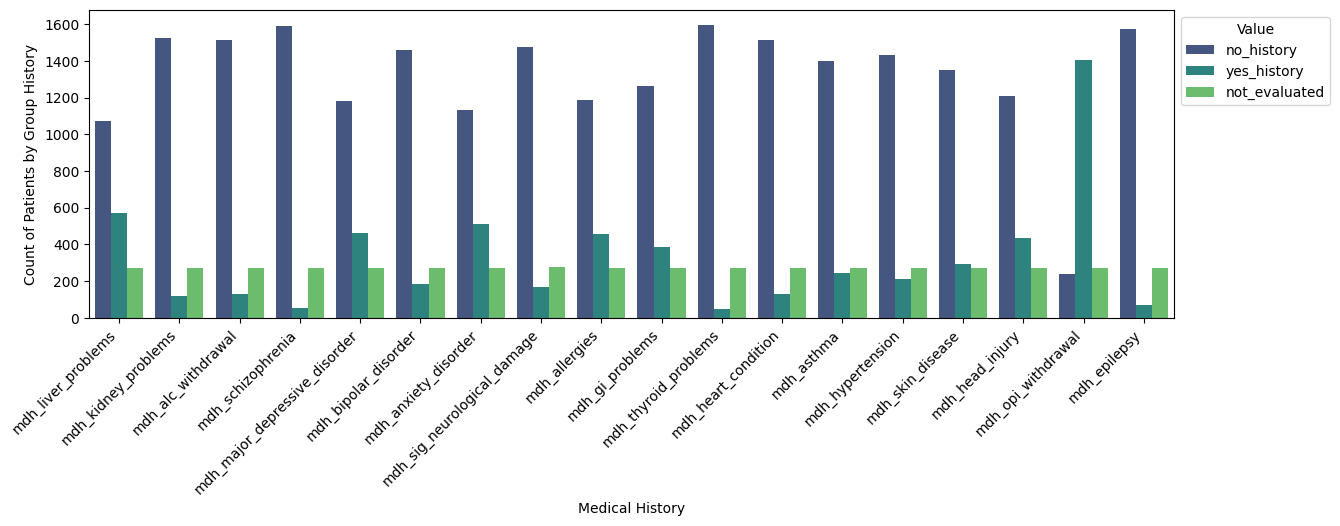

In [46]:
# visualize mdh_vc table
plt.figure(figsize=(14, 4))
sns.barplot(x=mdh_vc.column, y=mdh_vc['count'], data=mdh_vc, hue='value', palette='viridis')
plt.xticks(rotation=45, ha='right');
# move legend outside of plot
plt.legend(loc='upper left', bbox_to_anchor=(1,1), title='Value')
plt.ylabel('Count of Patients by Group History')
plt.xlabel('Medical History');